In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import pickle

In [4]:
df=pd.read_csv("spam.csv",encoding="latin")

In [7]:
df.head()

,class,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
df.shape

(5572, 5)

In [9]:
df=df.iloc[:,:2]
df.head ()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df["class"].value_counts()

ham     4825
spam     747
Name: class, dtype: int64

Data Pre-processing

In [14]:
#Data preprocessing
import re
import nltk

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(df)):
    review = re.sub("[^a-zA-Z]", " ", df["message"][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words("english")]
    review = " ".join(review)
    corpus.append(review)

Creating Bag of Words model

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

In [16]:
y=pd.get_dummies(df["class"])
y=y.iloc[:,1].values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

Train Test Split

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

Naive bayes classifier

In [18]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train,y_train)
y_pred = spam_detect_model.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       967
           1       0.96      0.95      0.96       148

    accuracy                           0.99      1115
   macro avg       0.98      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [20]:
confusion_m=confusion_matrix(y_test,y_pred)
confusion_m

array([[961,   6],
       [  7, 141]], dtype=int64)

<AxesSubplot: >

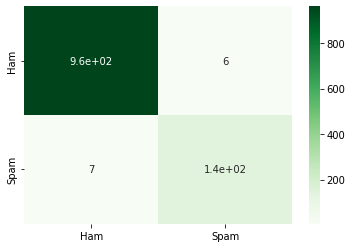

In [25]:
x_axis_labels = ['Ham','Spam']
y_axis_labels = ['Ham','Spam']

sns.heatmap(confusion_m, annot=True,cmap='Greens', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

In [26]:
filename = "pickle.pkl"
pickle.dump(spam_detect_model, open(filename, "wb"))

In [27]:
pickle.dump(cv, open("transform.pkl", "wb"))